# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [46]:
# Installing the libraries with the specified version.
# I received incompatability errors so I removed the line for Pandas 1.5.3
# OLD
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

# NEW
!pip install numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 -q --user


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np;
import pandas as pd;

# import libraries for data visualization
import matplotlib.pyplot as plt;
import seaborn as sns;

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# Mounting my Google Drive Here

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Write your code here to read the data
# Inputting the file path from my Google Drive to where the foodhub_order.csv data set is located

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')

In [5]:
# Write your code here to view the first 5 rows
# My data frame is called "df"
# df.head() will print the 1st 5 rows in a data set. I do not need to explicitly state the number 5 like df.head(5)

df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
# df.shape will give me the total number of rows and columns in any data set.
# It returns a tuple in the form of ex. (1111, 11) which would indicate 1111 rows and 11 columns.

df.shape

(1898, 9)



```
# This is formatted as code
```

#### Observations:


In the current data set for foodhub_order there are 1898 rows and 9 columns as indicated from the df.shape command above.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
# df.info will give me the range of data types across the columns
# including column names, non-null counts and data types of the columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


1. There are 9 columns and 1898 total rows ranging from index 0 to 1897.
2. There is no missing data as indicated by the full 1898 non-null values
3. 'order_id', 'customer_id', 'food_preparation_time', and 'delivery_time' are all 64-bit Integer data types.
4. 'restaurant_name', cuisine_type', 'day_of_the_week', and 'rating' are all object data types which represent strings.
5. 'cost_of_the_order' is a 64-bit floating point (decimal) data type
6. The data types are: float64(1), int64(4), object(4)
7. The associated memory usage of this data frame is 133.6KB which is not too large. There should be no need to downcast data types or remove columns, however if memory usage was an issue we could change the 'object' data type to 'category' data type to potentially optimize memory usage.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
# Per above, the output of df.info() confirms that all 1898 rows have non-null values across all columns.
# Each column lists 1898 non-null entries, which verifies that there are no missing values in the dataset.
# re-running df.info() again here.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


1. Per above, the output of df.info() confirms that all 1898 rows have non-null values across all columns.
2. Each column lists 1898 non-null entries, which verifies that there are no missing values in the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
# The describe() method will provide me a summary of all numerical columns, including the 'food_preparation_time'
# If I just wanted to see the min, mean, and max for numerical values I could specify something like...
# min_time = df['food_preparation_time'].min().   This would give me the minimum value for'food_preparation_time'
# without having to view the entire summary data table.

df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


The Minimum, Average/Mean, and Maximum times for the food preparation from the dataset are as follows:

- **Minimum** Preparation Time: 20 minutes

- **Average/Mean** Preparation Time: 27.37 minutes

- **Maximum** Preparation Time: 35 minutes

**Note** - there is no missing data in the data set.

1. Total range for food preparation is between 20 minutes and 35 minutes.
2. The standard deviation for 'food_prepration_time' does not seem high so this would indicate that the restaurants have fairly similar food preparation times.
3. The average/mean of 27.27 minutes aligns closely to the median 50% percentile (27 minutes).

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Write the code here
# using df['rating'].value_counts()counts how many times each unique value appears in the 'rating' column
# It then returns those counts in descending order.

df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:


- The table above shows that a significant number of orders (736) were not rated.
- Ratings of **5** are the most frequent among those orders that are rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [11]:
# Write the code here
# I plan on using histograms and boxplots for numerical data. (e.g., cost_of_the_order, delivery_time, food_preparation_time)
# I plan on using countplots or bar charts for categorical type data. (e.g., rating, cuisine_type, day_of_the_week, restaurant_name)

#validating total number of unique order IDs should equal 1898
UniqueOrderIDs = df['order_id'].nunique()
print ("Total unique order IDs = ", UniqueOrderIDs)

#checking total number of unique customer IDs
UniqueCustIDs = df['customer_id'].nunique()
print ("Total unique customer IDs = ", UniqueCustIDs)

#checking total number of unique restaurant names
UniqueRestaurants = df['restaurant_name'].nunique()
print ("Total unique restaurants are = ", UniqueRestaurants)

#checking total number of unique cuisine types
UniqueCuisineTypes = df['cuisine_type'].nunique()
print ("Total unique cuisine types are = ", UniqueCuisineTypes)

#checking total number of unique days of the week
UniqueDays = df['day_of_the_week'].nunique()
print ("Total unique days of the week are = ", UniqueDays)

# Display unique values for 'day_of_the_week'
unique_days = df['day_of_the_week'].unique()
print(unique_days)



Total unique order IDs =  1898
Total unique customer IDs =  1200
Total unique restaurants are =  178
Total unique cuisine types are =  14
Total unique days of the week are =  2
['Weekend' 'Weekday']


**Observations:**

- Total unique order ID's = 1898 as expected

- Total unique customer ID's = 1200. This means there are repeat customers.
- Total unique restaurants are =  178
- Total unique cuisine types are =  14
- Total unique days of the week are only 2; **weekday** and **weekend**


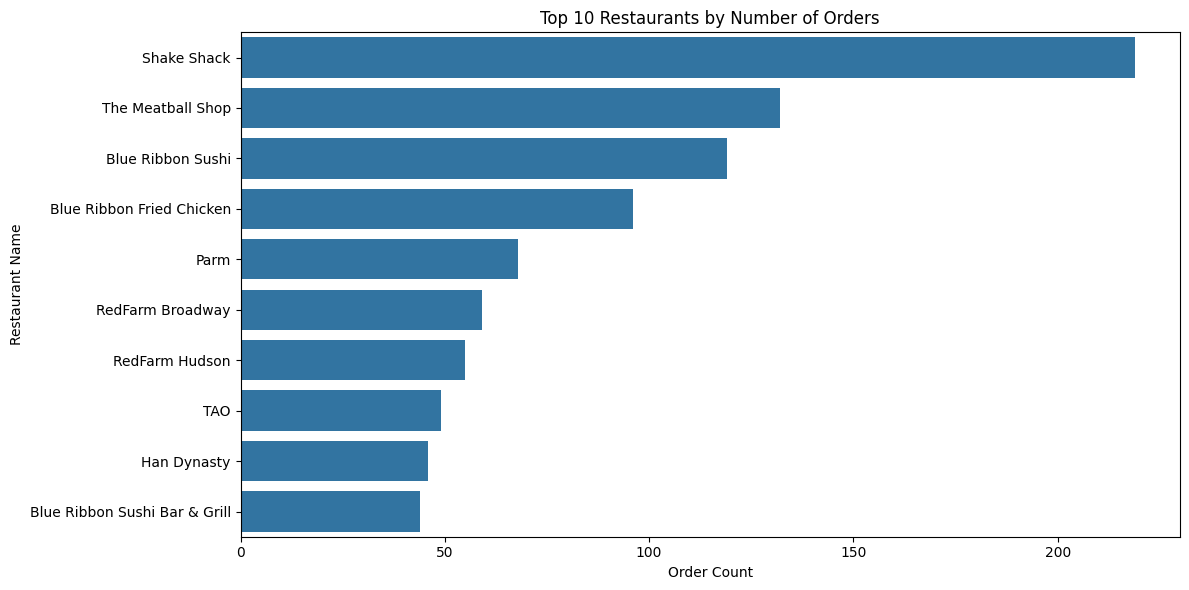

In [12]:
# Write the code here
# I plan on using histograms and boxplots for numerical data. (e.g., cost_of_the_order, delivery_time, food_preparation_time)
# I plan on using countplots or bar charts for categorical type data. (e.g., rating, cuisine_type, day_of_the_week, restaurant_name)

# Top 10 restaurants by the number of orders.

# Countplot for 'restaurant_name' column

plt.figure(figsize=(12, 6))
sns.countplot(
    y=df['restaurant_name'],
    order=df['restaurant_name'].value_counts().index[:10]  # Top 10 restaurants
)
plt.title('Top 10 Restaurants by Number of Orders')
plt.xlabel('Order Count')
plt.ylabel('Restaurant Name')
plt.tight_layout()
plt.show()





**Observations:**

- The top restaurant by total number of orders is "**Shake Shack**" by a seemingly wide margin.

- The least popular restaurant in the top 10 is "**Blue Ribbon Sushi Bar & Grill**"


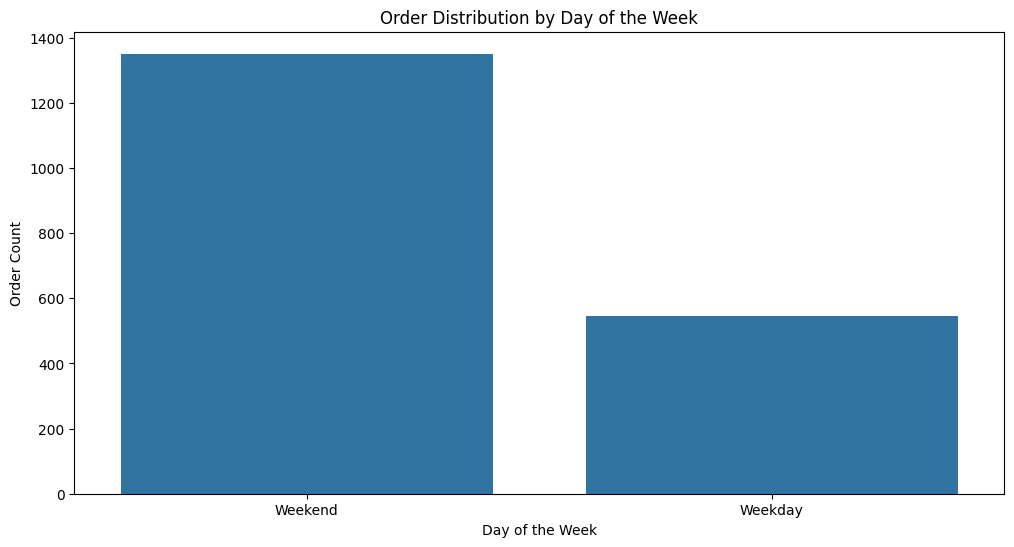

In [13]:
# Write the code here

# Countplot for the 'day_of_the_week' column

plt.figure(figsize=(12, 6))
sns.countplot(
    x=df['day_of_the_week'],  # Use x-axis for 'day_of_the_week'
    order=df['day_of_the_week'].value_counts().index  # Ensure days are ordered by frequency
)
plt.title('Order Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Order Count')
plt.show()



In [14]:
# Write the code here

# Analyzing the percentages of each day of the week against the total

category_percentages = df['day_of_the_week'].value_counts(normalize=True) * 100
print(category_percentages)

day_of_the_week
Weekend    71.18019
Weekday    28.81981
Name: proportion, dtype: float64


**Observations:**

- The vast majority of orders are placed on the weekends by over a 2:1 ratio.

- Unfortunately the data is not broken down by actual day, however a deeper dive into any application timestamps, may offer the opportunity to futher break down the data by specific day of the week.
- 71% of the orders were placed on the weekend


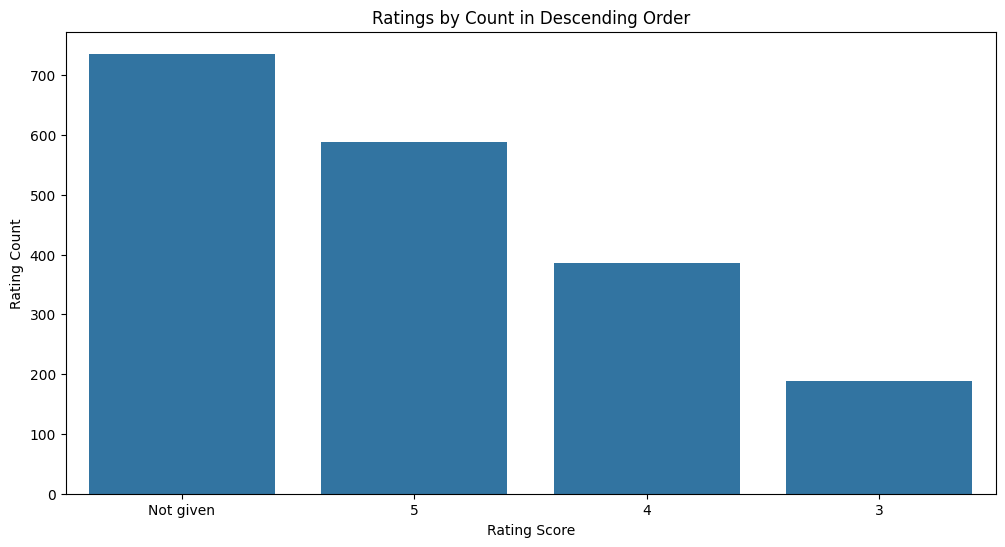

In [15]:
# Write the code here

# Countplot for the 'rating' column

plt.figure(figsize=(12, 6))
sns.countplot(
    x=df['rating'],  # Use x-axis for 'rating'
    order=df['rating'].value_counts().index  # Ensure ratings are ordered by frequency
)
plt.title('Ratings by Count in Descending Order')
plt.xlabel('Rating Score')
plt.ylabel('Rating Count')
plt.show()

In [16]:
# Write the code here

# Analyzing the percentages of each rating against the total

category_percentages = df['rating'].value_counts(normalize=True) * 100
print(category_percentages)

rating
Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: proportion, dtype: float64


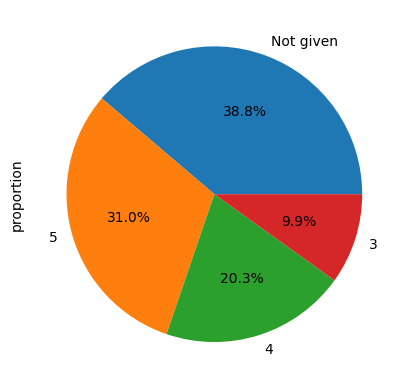

In [17]:
# Write the code here

# Analyzing the percentages of each rating against the total and present in a pie chart

df['rating'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%');

**Observations:**

- A high number of orders (700+) did not get rated.

- The highest rating count is **5** for those orders that were rated.
- 38.7% of the ratings were not given


In [18]:
# Write the code here

# Checking data entries for Cuisine Type in case there are inconsistencies like leading or trailing spaces.

print(df['cuisine_type'].unique())  # Inspect unique values


['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


**Observations:**

- All '**Cuisine Type**' data looks good.


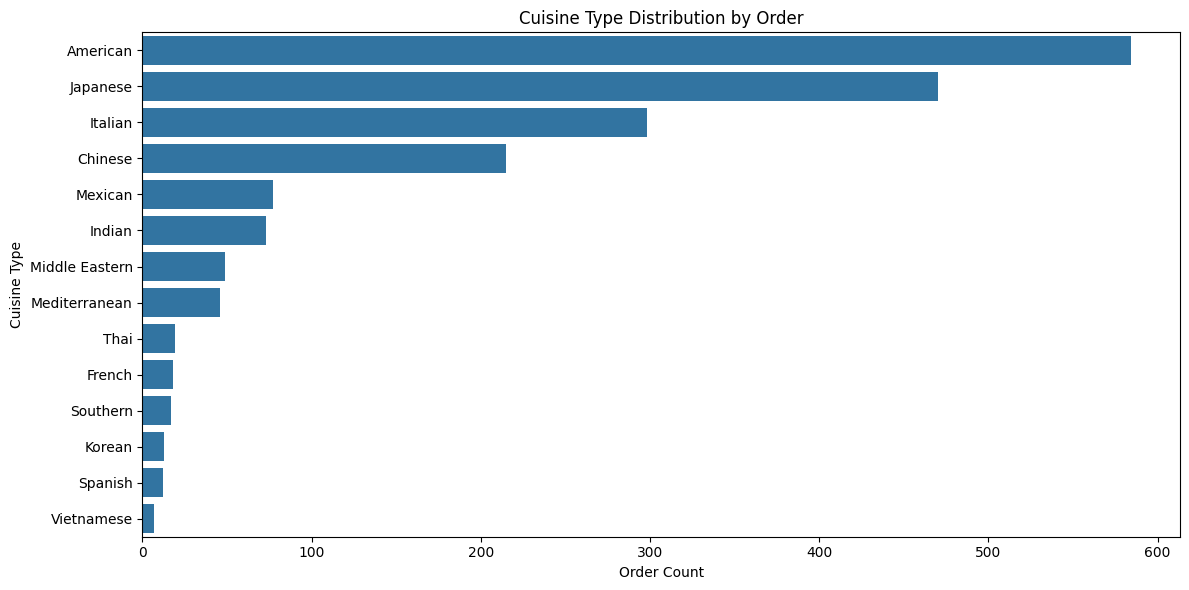

In [19]:
# Write the code here

# Countplot for the 'cuisine type' column

# Horizontal countplot for 'cuisine_type'
plt.figure(figsize=(12, 6))  # Adjusted figure size
sns.countplot(
    y=df['cuisine_type'],  # Place 'cuisine_type' on the y-axis for horizontal bars
    order=df['cuisine_type'].value_counts().index,  # Sort by frequency
)
plt.title('Cuisine Type Distribution by Order')
plt.xlabel('Order Count')  # Label for the x-axis
plt.ylabel('Cuisine Type')  # Label for the y-axis
plt.tight_layout()  # Adjust layout for better display same as above
plt.show()


**Observations:**

- The most popular cuisine type is "American" and least popular is "Vietnamese".


In [20]:
# Write the code here

# Checking data entries for Restaurant Name in case there are inconsistencies like leading or trailing spaces.
# I could perform the same review for all data to look at inconsistencies but for time and space savings,
# I will complete this with just the two examples here.

print(df['restaurant_name'].unique())  # Inspect unique values

['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'Five Guys Burgers and Fries' 'Tortaria'
 'Cafe Mogador' 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza'
 'Sushi of Gari 46' 'The Kati Roll Company' 'Klong' '5 Napkin Burger'
 'TAO' 'Parm' 'Sushi Samba' 'Haru Gramercy Park'
 'Chipotle Mexican Grill $1.99 Delivery' 'RedFarm Broadway' 'Cafeteria'
 'DuMont Burger' "Sarabeth's East" 'Hill Country Fried Chicken' 'Bistango'
 "Jack's Wife Freda" "Mamoun's Falafel" 'Prosperity Dumpling'
 'Blue Ribbon Sushi Bar & Grill' 'Westville Hudson' 'Blue Ribbon Brooklyn'
 'Nobu Next Door' 'Osteria Morini' 'Haandi' 'Benihana' 'Han Dynasty'
 'Chote Nawab' 'Mission Cantina' "Xi'an Famous Foods" 'Rubirosa'
 "Joe's

In [21]:
# Write the code here

# Checking data entries for Restaurant Name for all cases where there is a <5 count or low frequency/

low_freq = df['restaurant_name'].value_counts()[df['restaurant_name'].value_counts() < 5]
print(low_freq)

restaurant_name
Amma                        4
Lantern Thai Kitchen        4
V-Nam Cafe                  4
Tortaria                    4
Joe's Shanghai _Àü£¾÷´    4
                           ..
Sushi Choshi                1
Dos Caminos Soho            1
La Follia                   1
Philippe Chow               1
'wichcraft                  1
Name: count, Length: 109, dtype: int64


**Observations:**

- All '**Restaurant Name**' data looks good.
- There are a total of **109** resturants that have a count of less than 5 orders in the data.
- I could perform the same review for all data to look at inconsistencies but for time and space savings, I will complete this with just the two examples above.

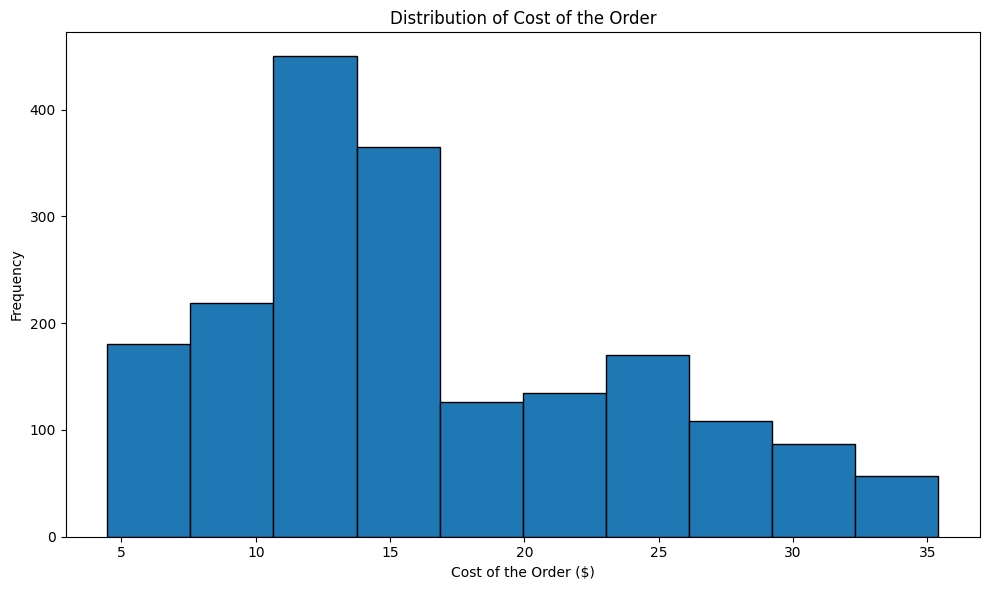

In [22]:
# Write the code here

# Histogram for 'cost_of_the_order'
plt.figure(figsize=(10, 6))  # Set figure size
plt.hist(df['cost_of_the_order'], bins=10, edgecolor='black')  # Create histogram
plt.title('Distribution of Cost of the Order')  # Add title
plt.xlabel('Cost of the Order ($)')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis
plt.tight_layout()  # Adjust layout
plt.show()



**Observations:**

- The histogram of the Cost of the Orders above is slightly right-skewed. This shows most orders are clustered in the lower cost ranges.
- Most orders fall within the 10 to 20 dollar range.

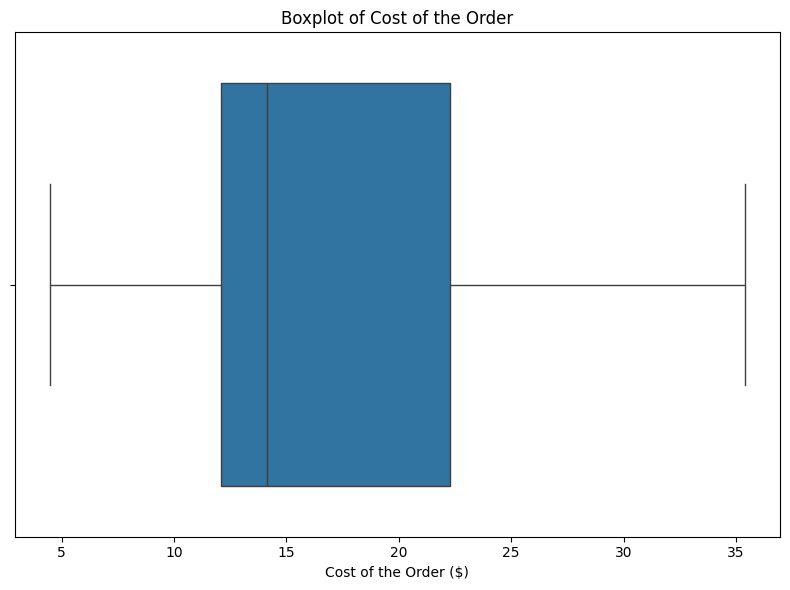

In [23]:
# Write the code here

# Boxplot for 'cost_of_the_order'
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(x=df['cost_of_the_order'])  # Create boxplot
plt.title('Boxplot of Cost of the Order')  # Add title
plt.xlabel('Cost of the Order ($)')  # Label x-axis
plt.tight_layout()  # Adjust layout
plt.show()


**Observations:**

- The median order cost appears to be around 15 dollars. This confirms that half of the orders are below 15 dollars and half are above.
- The minimum order cost is approximately 5 dollars.

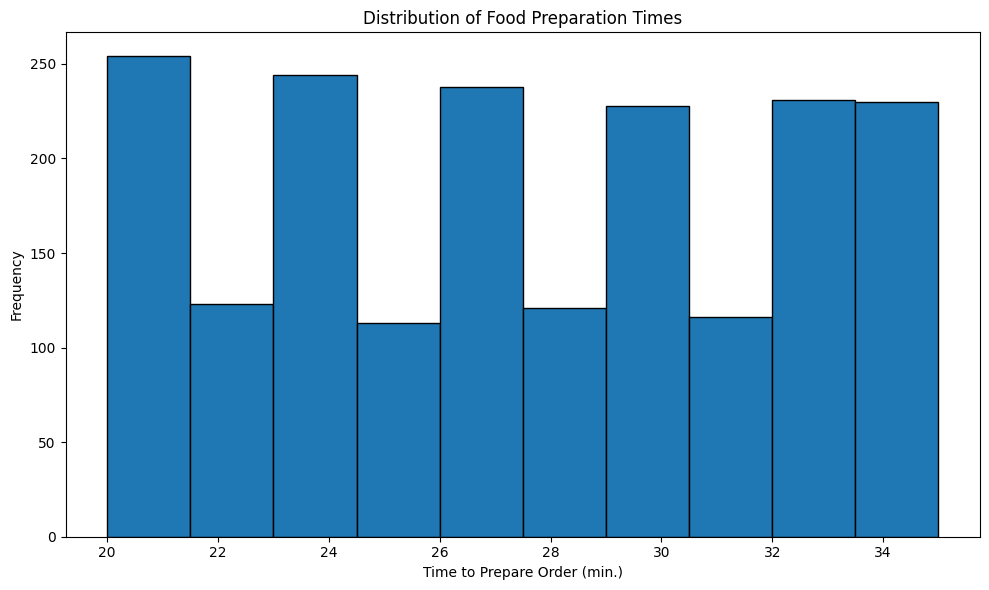

In [24]:
# Write the code here

# Histogram for 'food_preparation_time'
plt.figure(figsize=(10, 6))  # Set figure size
plt.hist(df['food_preparation_time'], bins=10, edgecolor='black')  # Create histogram
plt.title('Distribution of Food Preparation Times')  # Add title
plt.xlabel('Time to Prepare Order (min.)')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis
plt.tight_layout()  # Adjust layout
plt.show()

**Observations:**

- The majority of food preparation times are within a range of 20 to 30 minutes.

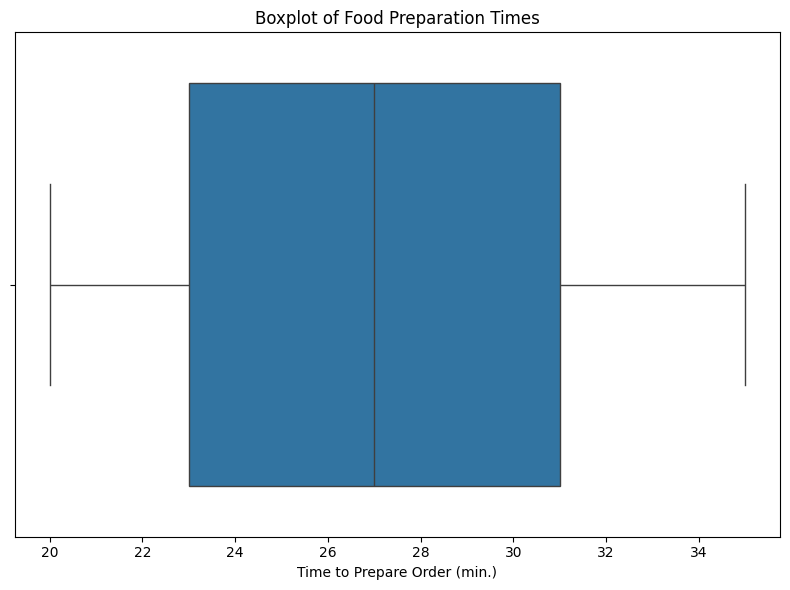

In [25]:
# Write the code here

# Boxplot for 'food_preparation_time'
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(x=df['food_preparation_time'])  # Create boxplot
plt.title('Boxplot of Food Preparation Times')  # Add title
plt.xlabel('Time to Prepare Order (min.)')  # Label x-axis
plt.tight_layout()  # Adjust layout
plt.show()

**Observations:**

- The median food preparation time is around 27 minutes.
- The preparation time generally falls between 20 and 35 minutes, with some exceptions due to outliers

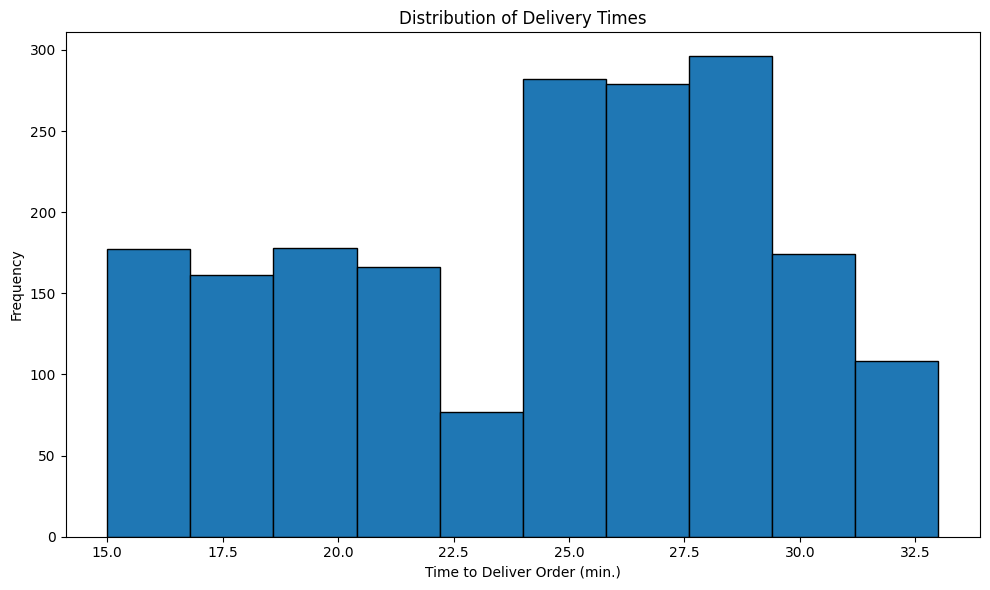

In [26]:
# Write the code here

# Histogram for 'delivery_time'
plt.figure(figsize=(10, 6))  # Set figure size
plt.hist(df['delivery_time'], bins=10, edgecolor='black')  # Create histogram
plt.title('Distribution of Delivery Times')  # Add title
plt.xlabel('Time to Deliver Order (min.)')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis
plt.tight_layout()  # Adjust layout
plt.show()

**Observations:**

- The majority of food delivery times are within a range of about 24 to 31 minutes.
- The data seems to be fairly evenly distributed with no extreme left or right skewness.

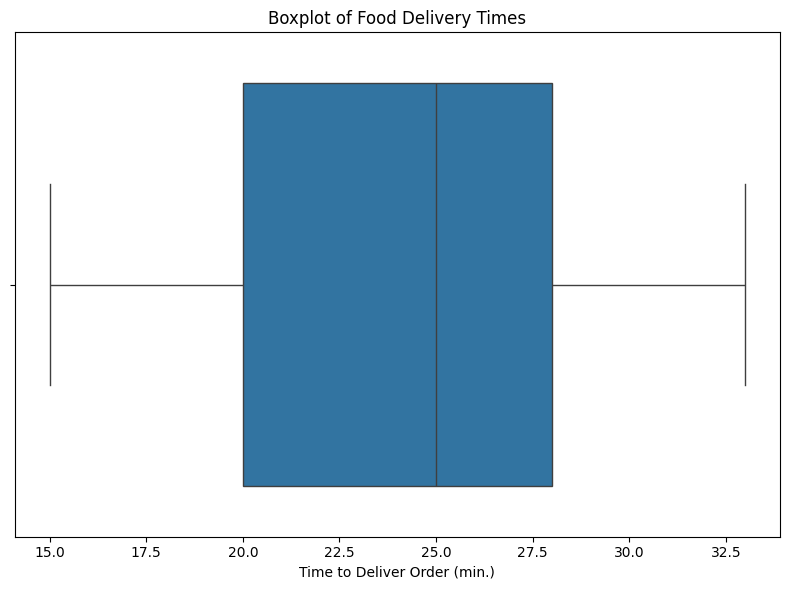

In [27]:
# Write the code here

# Boxplot for 'delivery_time'
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(x=df['delivery_time'])  # Create boxplot
plt.title('Boxplot of Food Delivery Times')  # Add title
plt.xlabel('Time to Deliver Order (min.)')  # Label x-axis
plt.tight_layout()  # Adjust layout
plt.show()

**Observations:**

- The median delivery time is 25 minutes.
- The middle 50% of delivery times (IQR) fall between 20 and 28 minutes, suggesting most deliveries occur within this range.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [28]:
# Write the code here

# Prints the top 5 restaurants by order count.
top_restaurants = df['restaurant_name'].value_counts().index[:5]
print(top_restaurants)



Index(['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken', 'Parm'],
      dtype='object', name='restaurant_name')


**Observations:**

The top 5 restaurants by order count are:
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [29]:
# Write the code here

# Filter for weekend orders and find the top cuisine
# Assign the top cuisine and the count to variables, then insert and print the variables as a string to screen.
top_cuisine_counts = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()
top_cuisine = top_cuisine_counts.idxmax()
top_count = top_cuisine_counts.max()

print(f"The top cuisine on the weekend is: {top_cuisine} with {top_count} orders")


The top cuisine on the weekend is: American with 415 orders


#### Observations:

- The top cuisine on the weekend is: **American** with **415** orders


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [30]:
# Write the code here

# Calculate the total number of orders
total_orders = len(df)

# Filter orders where the cost is greater than $20
orders_above_20 = df[df['cost_of_the_order'] > 20]

# Calculate the percentage
percentage_above_20 = (len(orders_above_20) / total_orders) * 100

# Print the result with the variable above and ensure the result has 2 decimal places
print(f"Percentage of orders costing more than $20: {percentage_above_20:.2f}%")


Percentage of orders costing more than $20: 29.24%


#### Observations:
- Nearly 30% of the orders are above 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [31]:
# Write the code here

mean_delivery_time = df['delivery_time'].mean()
print(f"The mean delivery time is {mean_delivery_time:.2f} minutes.")


The mean delivery time is 24.16 minutes.


#### Observations:
The average/mean order delivery time is about **24 min**. or 24.16 min. exactly.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [32]:
# Write the code here

# Count the number of occurrences of each customer_id
customer_counts = df['customer_id'].value_counts()

# Filter for repeat customers (customers with more than one order)
repeat_customers = customer_counts[customer_counts > 1]

# Display the number of repeat customers
print(f"Number of repeat customers: {len(repeat_customers)}")

# Find the top 3 most frequent customers
top_customers = df['customer_id'].value_counts().head(3)

# Display the top 3 customers and their order counts
print(top_customers)


Number of repeat customers: 416
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
The customer IDs with the highest repeat frequency are **52832**, **47440**, and **83287**


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


                       cost_of_the_order  delivery_time  food_preparation_time
cost_of_the_order               1.000000      -0.029949               0.041527
delivery_time                  -0.029949       1.000000               0.011094
food_preparation_time           0.041527       0.011094               1.000000
--------------------------------------------------------------------------------


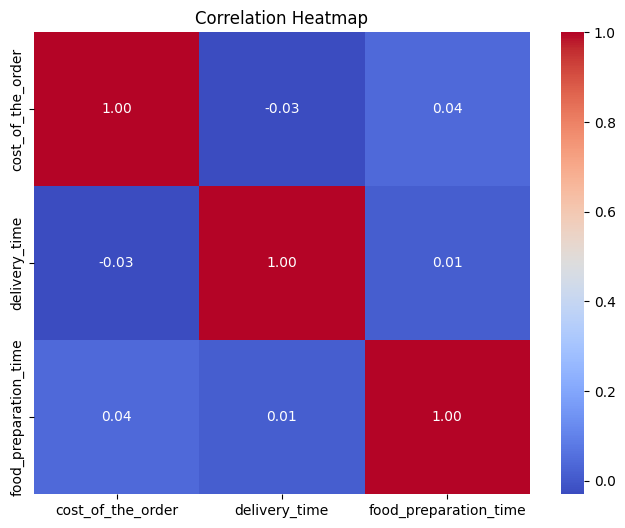

In [33]:
# Write the code here
# Reviewing the potential correlation between the numerical values.
# Calculate the correlation matrix and heat map for numerical variables

correlation_matrix = df[['cost_of_the_order', 'delivery_time', 'food_preparation_time']].corr()
print(correlation_matrix) # print the correlation_matrix to screen
print('-' * 80)  # Prints 80 dashes

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Draw the heatmap with custom palette.
plt.title('Correlation Heatmap')  # Add a title
plt.show()  # Display the heatmap




#### Observations:
- Based on the above correlation heat map between the numerical variables, there does not seem to be a strong correlation between the 'cost_of_the_order', the 'delivery_time', and the 'food_preparation_time'.


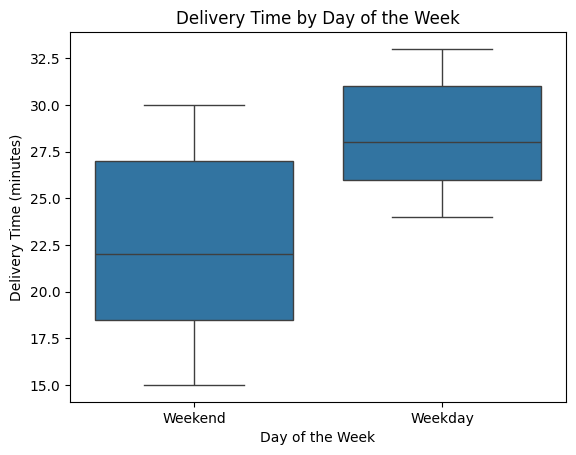

In [34]:
# Write the code here
# Reviewing the relationship between the numerical values and categorical values.
# (e.g. - see if the average 'delivery_time' differs between 'day_of_the_week')
# Compare 'delivery_time' to 'day_of_the_week'

sns.boxplot(x='day_of_the_week', y='delivery_time', data=df) #define boxplot
plt.title('Delivery Time by Day of the Week') #title
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.show() # display plot




#### Observations:
- Based on the above boxplots, the average delivery time on the weekend is just over 22.5 minutes but the average deliver time during the week is more than 5 minutes longer. This might indicate higher traffic levels during the week or decreased delivery drivers during the week compared to weekends. I would estimate it's a combination of both.
- Weekends have a wider IQR range, possibly due to higher order volumes or, again, due to traffic variability


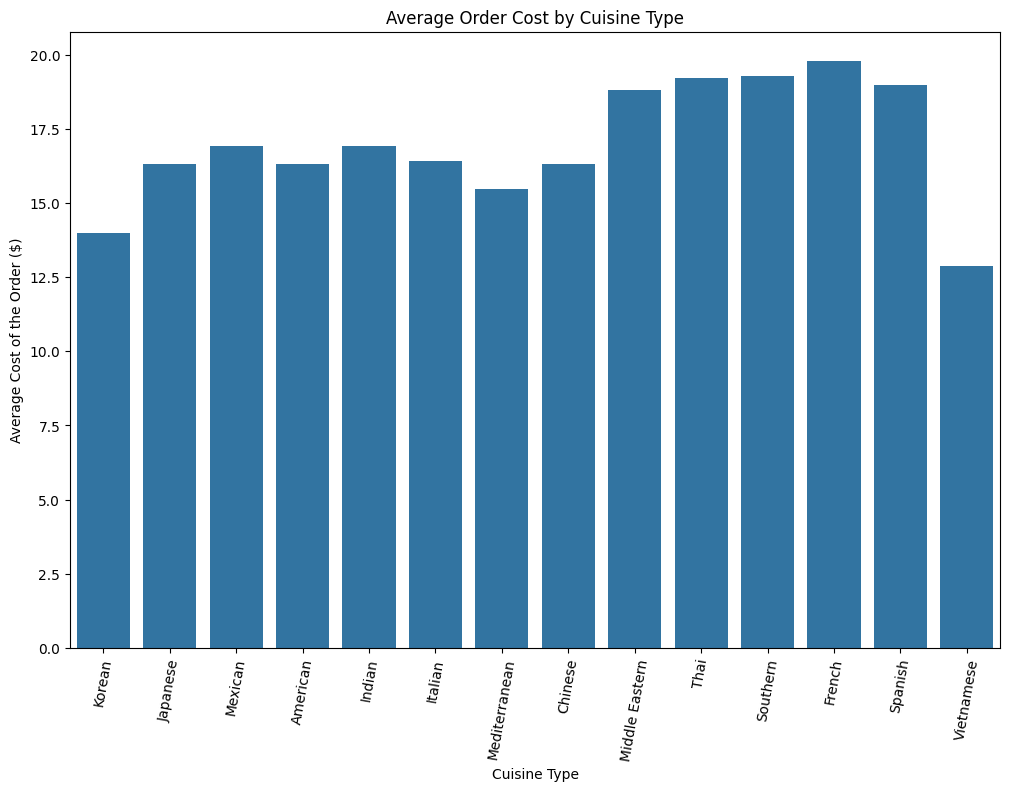

In [35]:
# Write the code here
# Reviewing the relationship between the numerical values and categorical values.
# Compare Average Order Cost by Cuisine Type

plt.figure(figsize=(12, 8))
sns.barplot(x='cuisine_type', y='cost_of_the_order', data=df, errorbar=None) # define plot and remove errorbars for simplicity
plt.title('Average Order Cost by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost of the Order ($)')
plt.xticks(rotation=80) # define angle of x axis words so they fit
plt.show() # show plot


#### Observations:
- Based on the above barchart, most cuisines have fairly similar average order costs.
- The cuisines that have higher average order costs may represent premium orders


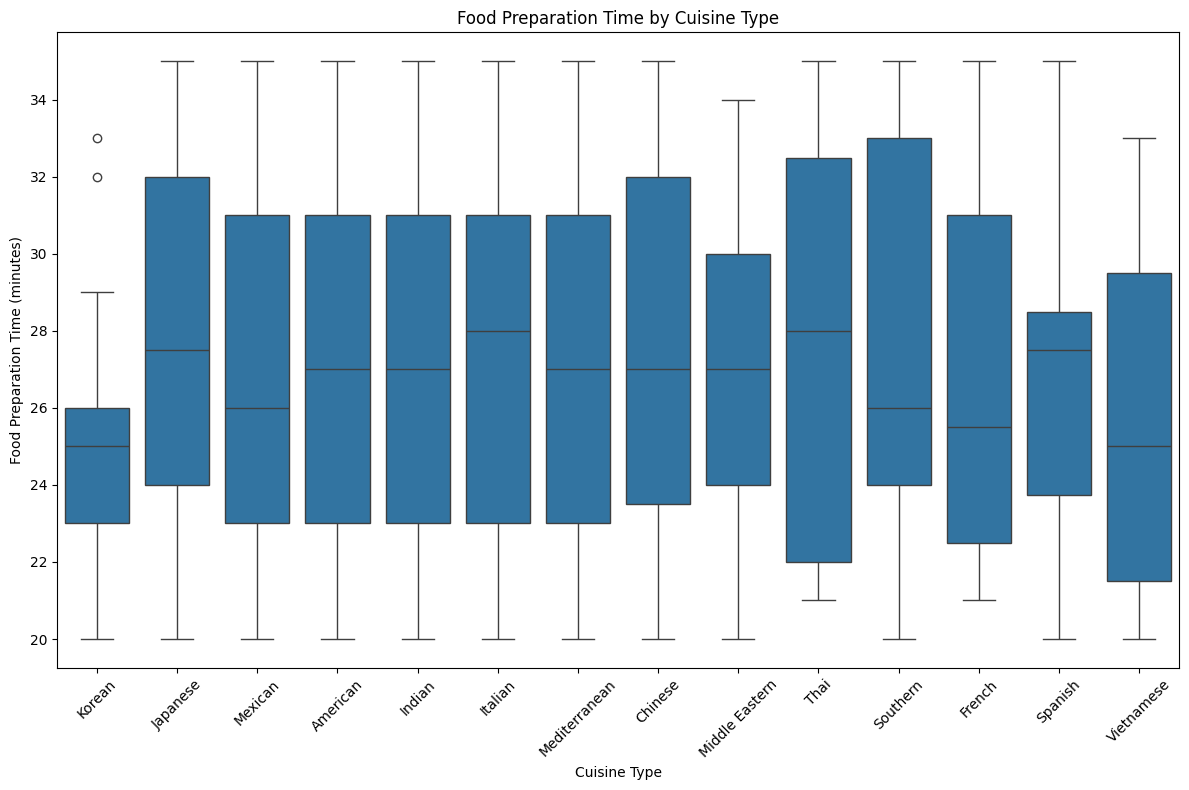

In [36]:
# Write the code here
# Reviewing the relationship between the numerical values and categorical values.
# Compare cuisine type to food preparation time to analyze which cuisines typically require more time to prepare

# Boxplot for food preparation time by cuisine type
plt.figure(figsize=(12, 8))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.title('Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time (minutes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



#### Observations:
- Based on the above boxplot, most cuisines have fairly similar food prepration times between 20-35 minutes with the average or mean prepration time of about 27 minutes.
- One slight outlier cuisine is **Korean** which has slightkly lower food prearation times.
- Most cuisines within the 75 percentile have food prearation times at or under 32 minutes.


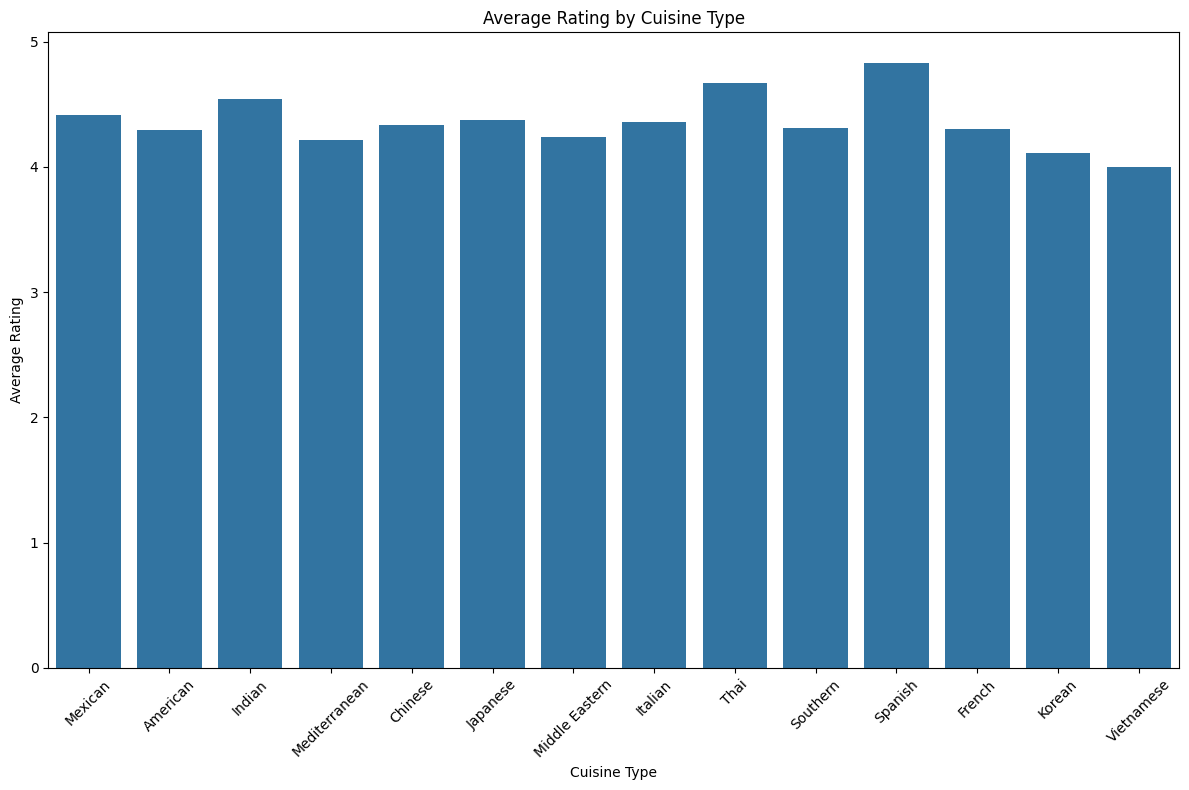

In [37]:
# Write the code here
# Reviewing the relationship between the numerical values and categorical values.
# Compare cuisine type to average rating

# Convert 'rating' to numeric, replacing non-numeric values with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Remove rows with NaN in 'rating' to filter out the non rated rows.
df_filtered = df.dropna(subset=['rating'])

# Create the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='cuisine_type', y='rating', data=df_filtered, errorbar=None) # remove error bars for simplicity
plt.title('Average Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for cleaner display
plt.show()


#### Observations:
- After I remove all non-numeric values the cuisine types all have a very close average rating with no visible outliers.


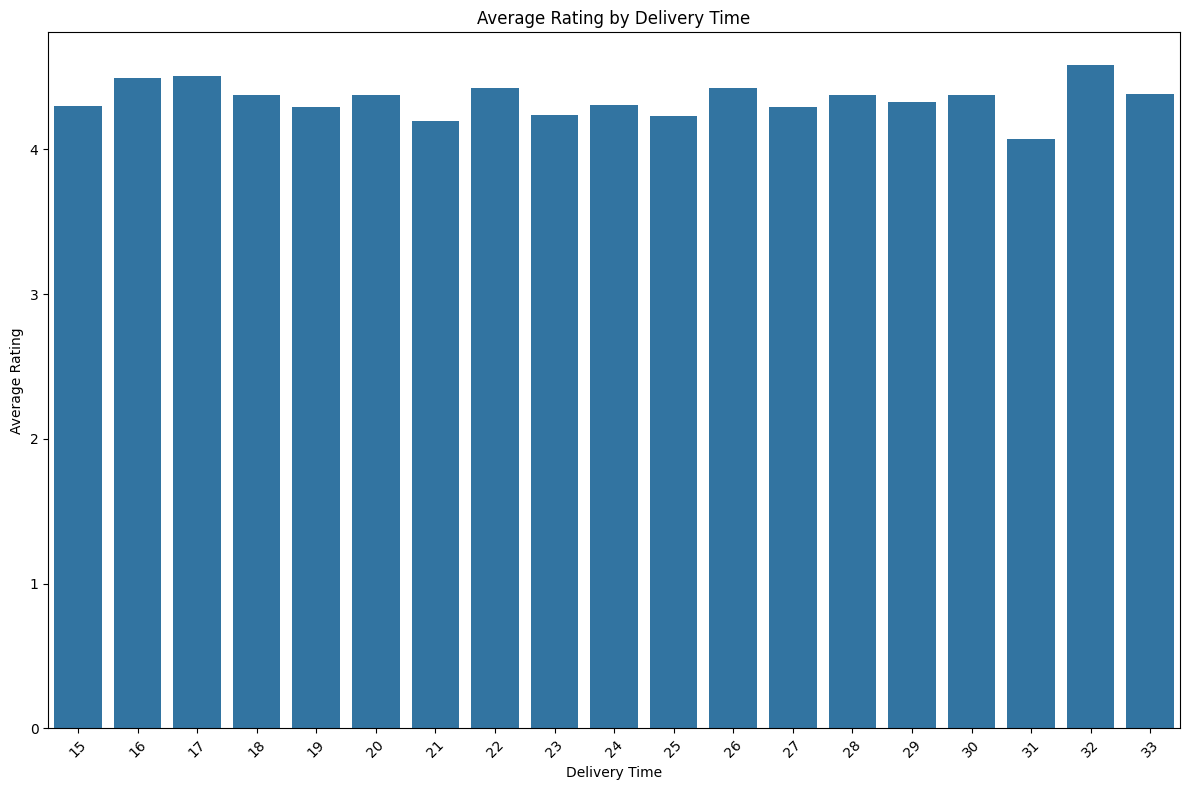

In [38]:
# Write the code here
# Compare delivery time to average rating

# Convert 'rating' to numeric, replacing non-numeric values with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Remove rows with NaN in 'rating' to filter out the non rated rows.
df_filtered = df.dropna(subset=['rating'])

# Create the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='delivery_time', y='rating', data=df_filtered, errorbar=None) # remove error bars for simplicity
plt.title('Average Rating by Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for cleaner display
plt.show()

#### Observations:
- After I remove all non-numeric values the times all have a very close average rating with no visible outliers similar to cuisine types.
- The average rating is above 4 for all average delivery times from 15 minutes to 33 minutes.


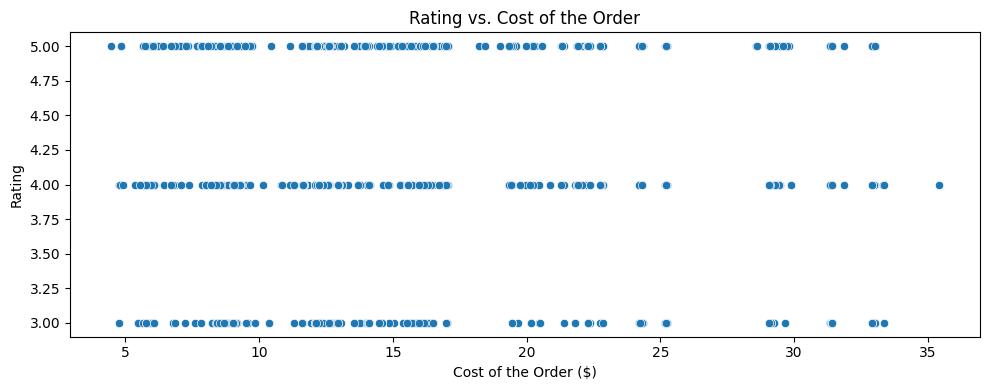

In [39]:
# Write the code here
# Compare average cost of the order to average rating

# Convert 'rating' to numeric, replacing non-numeric values with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Remove rows with NaN in 'rating' to filter out the non rated rows.
df_filtered = df.dropna(subset=['rating'])

# Scatter plot of rating vs. cost of the order
plt.figure(figsize=(10, 4))
sns.scatterplot(x='cost_of_the_order', y='rating', data=df_filtered)
plt.title('Rating vs. Cost of the Order')
plt.xlabel('Cost of the Order ($)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

#### Observations:
- After I remove all non-numeric values I can see most of the ratings are clustered around lower cost orders between 5 dollars and about 17 dollars.
- Ratings of 3, 4, and 5 are fairly similarly clustered around the lower cost orders nbut there is a higher clustering of 5 ratings for the lower cost orders vs. a 3 rating or 4 rating.
- As the order prices get higher, there is a much smaller clusting of ratings, indicating maybe a larger number of higher cost orders are not getting rated by the consumer.


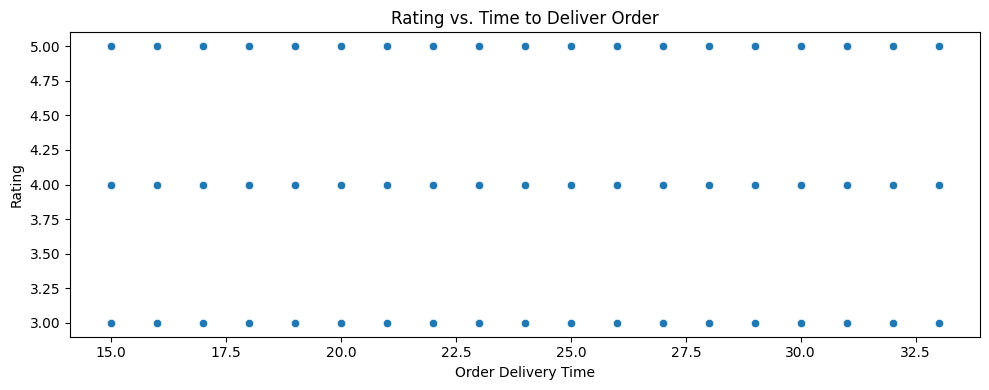

In [40]:
# Write the code here
# Compare average cost of the order to average delivery times

# Convert 'rating' to numeric, replacing non-numeric values with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Remove rows with NaN in 'rating' to filter out the non rated rows.
df_filtered = df.dropna(subset=['rating'])

# Scatter plot of rating vs. average delivery times
plt.figure(figsize=(10, 4))
sns.scatterplot(x='delivery_time', y='rating', data=df_filtered)
plt.title('Rating vs. Time to Deliver Order')
plt.xlabel('Order Delivery Time')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

#### Observations:
- Using a smilar scatter plot for ratings across delivery times, the ratings remain fairly consistent across different delivery times.
- The data doesn't show a strong correlation between delivery time and average rating, suggesting that delivery time alone may not  impact customer satisfaction which is interesting. I would think there would be more variability in the data.


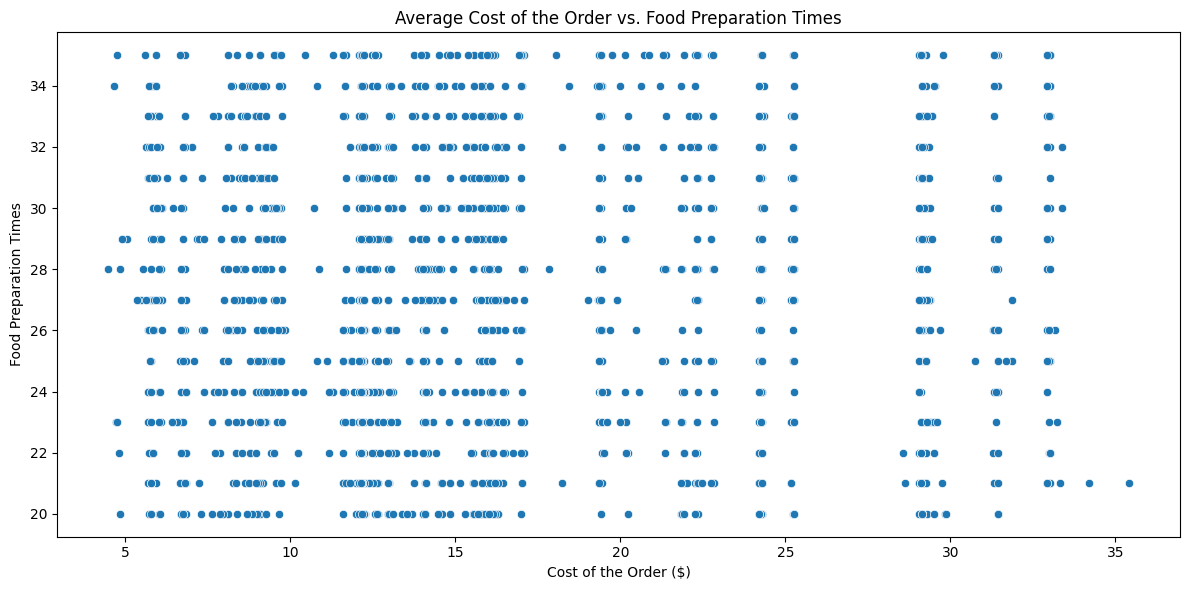

In [41]:
# Write the code here
# Compare average cost of the order to food preparation time.
# Do higher cost orders take longer to prepare?

# Scatter plot of rating vs. average delivery times
plt.figure(figsize=(12, 6))
sns.scatterplot(x='cost_of_the_order', y='food_preparation_time', data=df)
plt.title('Average Cost of the Order vs. Food Preparation Times')
plt.xlabel('Cost of the Order ($)')
plt.ylabel('Food Preparation Times')
plt.tight_layout()
plt.show()

#### Observations:
- Interestingly, there does not seem to be a strong correlation between the cost of an order and the time to prepare that order.
- Most food preparation times are concentrated around 20–30 minutes, regardless of the order cost.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [42]:
# Write the code here
# Group by 'restaurant_name' and calculate count and mean of ratings
eligible_restaurants = (
    df.groupby('restaurant_name')['rating'] # Group data by restaurant
    .agg(['count', 'mean'])  # Calculate count and mean of ratings - aggregates multiple calculations
    .rename(columns={'count': 'rating_count', 'mean': 'avg_rating'})  # Rename columns for readability
)

# Filter restaurants based on the given conditions
eligible_restaurants = eligible_restaurants[
    (eligible_restaurants['rating_count'] > 50) &  # Keeps restaurants with more than 50 ratings
    (eligible_restaurants['avg_rating'] > 4)      # Keeps restaurants with an average rating greater than 4
]

# Display the eligible restaurants
print(eligible_restaurants)


                           rating_count  avg_rating
restaurant_name                                    
Blue Ribbon Fried Chicken            64    4.328125
Blue Ribbon Sushi                    73    4.219178
Shake Shack                         133    4.278195
The Meatball Shop                    84    4.511905


#### Observations:
The above 4 restaurants have more than 50 ratings and an average rating greater than 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [43]:
# Write the code here
# Initialize the revenue column with a float dtype if not it generates an error as an INT.
df['revenue'] = 0.0  # Explicitly set it to float 64 bit

# Apply conditions
df.loc[df['cost_of_the_order'] > 20, 'revenue'] = df['cost_of_the_order'] * 0.25 # check for orders above $20 and temporarily assign to the 'revenue column
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'revenue'] = df['cost_of_the_order'] * 0.15 # Check for orders above $5 and below or equal to $20

# Calculate total revenue
total_revenue = df['revenue'].sum()

# Print the result
print(f"Total revenue generated by the company: ${total_revenue:.2f}")



Total revenue generated by the company: $6166.30


#### Observations:
- Based on the abiove conditions, the total revenue generated by the company is **6,166.30**.
- These are the surcharges and does not include the actual cost of the order.



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [52]:
# Write the code here
# Calculate total time for each order
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Filter orders that take more than 60 minutes
orders_above_60 = df[df['total_delivery_time'] > 60]

# Calculate the percentage of such orders
percentage_above_60 = (len(orders_above_60) / len(df)) * 100
# Total number of orders above 60 minutes.
number_above_60 = (len(orders_above_60))

# Print both results
print(f"Percentage of orders taking more than 60 minutes: {percentage_above_60:.2f}%")
print(f"Total # of orders taking more than 60 minutes: {number_above_60:}")


Percentage of orders taking more than 60 minutes: 10.54%
Total # of orders taking more than 60 minutes: 200


#### Observations:
- The percentage of orders that take more than 60 minutes in total to be delivered is: **10.54%**
- Total # of orders taking more than 60 minutes: **200**




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

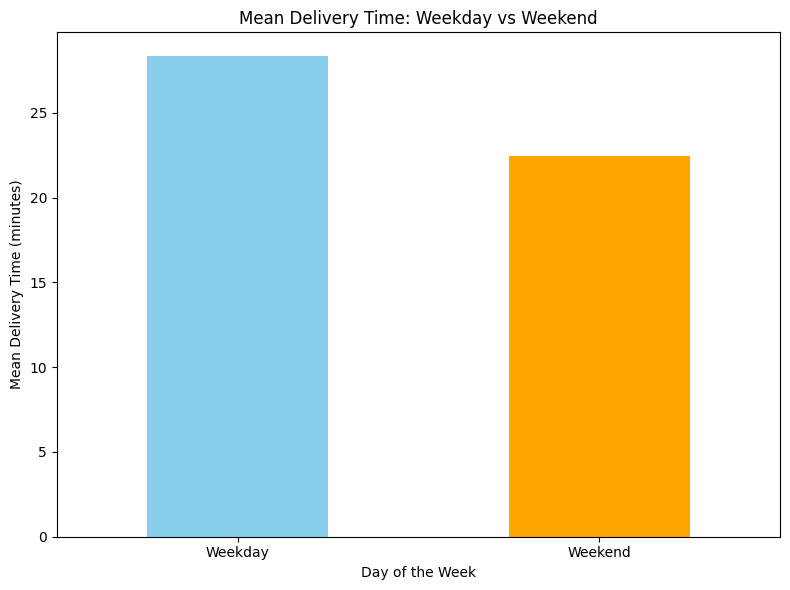

['Weekend' 'Weekday']


In [56]:
# Write the code here

# Calculate mean delivery time for weekdays and weekends
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Convert to a Series or DataFrame from above GroupBy to ensure proper plotting
mean_delivery_time.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 6)) # barchart with custom color to highlight difference
plt.title('Mean Delivery Time: Weekday vs Weekend')
plt.ylabel('Mean Delivery Time (minutes)')
plt.xlabel('Day of the Week')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print(df['day_of_the_week'].unique()) # Just validating unique values



#### Observations:
- The mean delivery times are shorter on the weekends by approximately **5 minutes**
- This may be the result of different traffic patterns on the weekend or an increase in the number of delivery drivers on the weekend.




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
**Order Cost Patterns:**

- Most orders fall within the 10–20 range, with approximately 29% of orders
 exceeding $20. This indicates a mid-tier pricing preference among customers.

**Delivery Time Observations:**

- The average delivery time is approximately 5 minutes shorter on weekends compared to weekdays, suggesting factors like lighter traffic or operational efficiencies during weekends.

**Preparation Time Consistency:**

- Food preparation times appear consistent across orders, with most restaurants completing preparation within 20–30 minutes. However, there are a few outliers that take significantly longer, possibly impacting delivery times.

**Customer Retention:**

- With 1,200 unique customers out of 1,898 total orders, there is evidence of repeat customers. A small percentage of customers place multiple orders, making them valuable for targeted loyalty campaigns.

**Top Restaurants and Cuisines:**

- Certain restaurants and cuisines dominate orders. Leveraging these insights can help prioritize advertising partnerships or promotional campaigns.

- Around 80% of the orders are for American, Japanese, Italian and Chinese cuisines.

**Outliers in Delivery Time:**

- Some orders take more than 60 minutes, which could negatively affect customer satisfaction. Investigating these cases (e.g., traffic, busy hours, or specific restaurants) could help reduce outliers.

**Low number of ratings:**

- Investigate the reason for the low number of overall ratings for FoodHub. Maybe they can create an incentive-based program if customers complete the rating after they place their order. Foodhub can follow up with emails, promos, etc.


### Recommendations:

**Promotional Offer Eligibility:**

- Only a subset of restaurants qualify for promotional offers based on ratings and order count criteria. Expanding the program to incentivize other restaurants might increase overall engagement.

**Revenue Drivers:**

- Orders above $20 generate significantly higher revenue due to the 25% margin, making them a critical target for upselling opportunities.
Customer Loyalty Programs:

- Develop loyalty programs to encourage repeat orders. For example:

- Offer discounts or perks after a customer places 5 orders.

- Use data on top customers to create personalized promotions.

**Operational Improvements:**

- Investigate outliers in delivery and preparation times to identify bottlenecks. Consider:

- Reviewing performance metrics for restaurants with frequent delays.

- Allocating additional delivery staff during peak hours.

**Upselling Opportunities:**

- Focus on increasing the order value for customers spending between $10–$20:

- Use bundle deals or “add-on” promotions to encourage higher spending.

**Restaurant Partnerships:**

- Reward top-performing restaurants (based on ratings and order volume) with advertising perks or reduced commission rates to strengthen partnerships.

**Monitor and Address Outliers:**

- Actively track and minimize long preparation and delivery times to improve customer satisfaction and ratings.

**Enhanced Marketing Campaigns:**

- Highlight the efficiency of weekend delivery times in advertising to build trust with customers.

**Enhanced Data Capture:**

- Continue to capture and collect more data points for futher analysis.



---